# Classification metrics

A critical step in building a machine learning model is checking how well it performs. This is done with the use of validation metrics. In this notebook, we’ll explore essential metrics for **classification**, equipping you with the knowledge to assess your models effectively. I'll cover when to use each metric, the pros and cons and how to implement them.

In [3]:
# Import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, log_loss


### Build a simple Model
Let's build a simple model so we can demonstrate classification metrics.
This will be a binary classification model that is suitable with our metrics.

In [4]:
# Load the Telco Churn dataset
df = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

# Pre-processing

# Binary encode categorical variables
df.drop('customerID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Prepare feature matrix and target vector
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# 1.0 Classification outcomes:
Before we dive into classification metrics, we must understand the following concepts:

- True Positives (TP): Cases where the model correctly predicted the positive class.
- False Positives (FP): Cases where the model predicted the positive class, but the actual class was negative.
- True Negatives (TN): Cases where the model correctly predicted the negative class.
- False Negatives (FN): Cases where the model predicted the negative class, but the actual class was positive.

In summary, TP and TN are the correct predictions, while FP and FN are the incorrect predictions made by a classification model.

# 1.1 Accuracy score

Accuracy is the most straightforward classification metric, measuring the proportion of correct predictions out of the total number of predictions. The formula for accuracy is:

![Alt text](Images/accuracy.png)

While accuracy is simple to understand and calculate, it’s not always the best choice. 
In cases of class imbalance, where one class significantly outnumbers the other, accuracy can be misleading. 
It’s essential to consider other metrics for a more comprehensive evaluation.

**Summary:**

Easy to understand and communicate and provides a simple evaluation of a model’s performance.
Not suitable for imbalanced classes, as it may favour the majority class.
Cannot differentiate between false positives and false negatives.
Should be used in combination with other metrics.

In [5]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7977288857345636



# 1.2 Confusion matrix

A confusion matrix is a table that summarises the performance of a classification model by comparing its predictions with actual values. It displays all four of our classification outcomes. 

The confusion matrix offers a visual representation of a model’s performance and helps identify where the model is making mistakes.

**Summary:**

- Provides a detailed breakdown of true positives, false positives, true negatives, and false negatives.
- Offers insights into model performance for each class, helpful for identifying weaknesses and biases.
- Serves as a foundation for calculating various metrics, such as precision, recall, F1-score, and accuracy.
- Can be harder to interpret and communicate as it doesn’t provide a single value for overall model performance (which may be desired for comparison purposes).

### Using sklearn
One way to show a confusion matrix is:

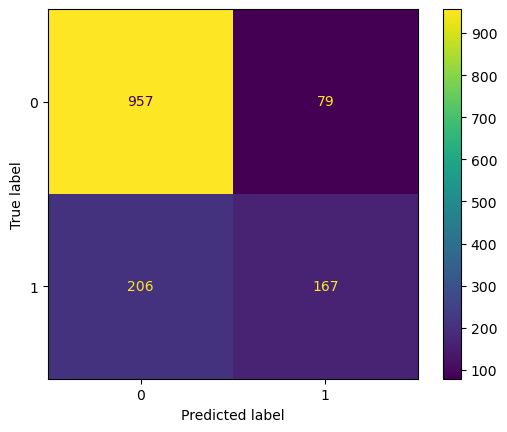

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

### Another method
We can also use seaborn to plot the confusion matrix:

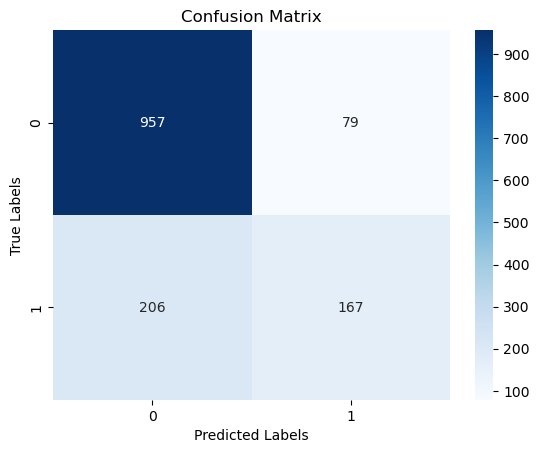

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### More labels:

Using the below function, we can add even more labels for counts, percentages and names of outcome.

credit: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

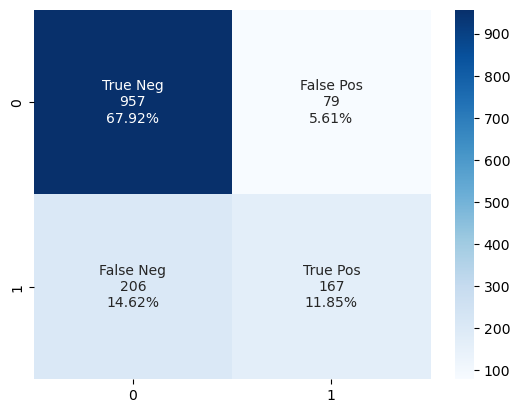

In [10]:
import numpy as np
import seaborn as sns

def plot_matrix(conf_matrix):
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

plot_matrix(conf_matrix)

# 1.3 Precision

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. The formula for precision is:

![Alt text](Images/precision.png)

Precision is particularly useful when the **cost of a false positive is high**, such as in spam detection or medical diagnosis. However, precision alone doesn’t account for false negatives, so it’s often used in conjunction with recall.

**Summary:**

- Precision is useful when false positives have higher consequences.
- Easy to understand and communicate.
- Does not consider the number of false negatives.
- Suitable for imbalanced data. However, it should be used in combination with other metrics, as high precision can come at the expense of recall on imbalanced datasets


In [11]:
from sklearn.metrics import precision_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate precision score
precision_score(y_test, y_pred)

0.6788617886178862

# 1.4 Recall (Sensitivity)
Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances. The formula for recall is:

![Alt text](Images/recall.png)

Recall is vital when the **cost of false negatives is high**, such as in cancer detection or credit fraud detection or when dealing with imbalanced datasets where the positive class is the minority. Like precision, recall should be considered alongside other metrics for a balanced evaluation.

**Summary:**

- Recall is useful when false negatives have higher consequences.
- Easy to understand and communicate.
- Does not consider the number of false positives.
- Suitable for imbalanced data. However, it should be combined with other metrics, as high recall can come at the expense of precision on imbalanced datasets.

In [19]:
from sklearn.metrics import recall_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate recall score
recall_score(y_test, y_pred)

0.4477211796246649

# 1.5 F1-Score
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. The formula for the F1-score is as follows:

![Alt text](Images/f1%20score.png)

F1-score is useful when **both false positives and false negatives are equally important** and you seek a balance between precision and recall.

**Summary:**

- F1-Score Balances precision and recall: Useful when both false positives and false negatives are important.
- Particularly useful with imbalanced data, where there are trade-offs between precision and recall.
- Biased towards models with similar precision and recall, which may not always be desirable.
- May not be enough to compare the performance of different models, especially when models have different trade-offs between false positives and false negatives.


In [20]:
from sklearn.metrics import f1_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate F1-score
f1_score(y_test, y_pred)

0.5395799676898223

- The easiest way to get precision, recall and F1 score in one shot is to use scikit-learn’s classification report. This gives us metrics fot both positive and negative classes:

In [21]:
from sklearn.metrics import classification_report

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the evaluation metrics
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



# 1.6 Area Under the Receiver Operating Characteristic Curve (AUC)
AUC is a performance measurement that illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1 — specificity) at various classification thresholds. An AUC value of 1 represents a perfect classifier, while 0.5 indicates a random classifier. It’s useful when comparing different models but should be used alongside other metrics for more specific insights into class performance.

**Summary:**

- Evaluates model performance across various classification thresholds.
- Suitable for imbalanced datasets.
- Can be used to compare the performance of different models.
- Assumes false positives and false negatives have equal costs.
- Less interpretable to non-technical stakeholders, as it requires understanding the ROC curve.
- May not be appropriate for datasets with a small number of observations or for models with a high number of classes.

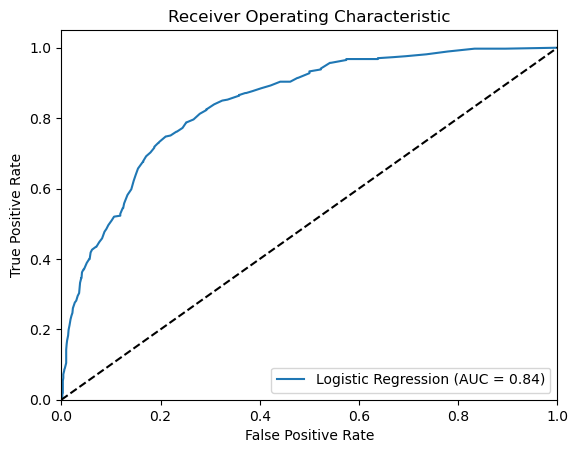

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve

plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



# 1.7 Precision-Recall curve

The precision-recall (PR) curve is a graphical representation of the performance of a binary classification model that measures the trade-off between precision and recall for different classification thresholds. 

PR curves are a useful tool for evaluating the performance of binary classification models when the positive class is rare and you want to maximize both precision and recall. However, they may not be as interpretable as other metrics, and may require additional analysis to identify the optimal classification threshold.

Here are some pros and cons of using PR curves:

**Summary:**

- Useful when the positive class is rare and you want to maximize both precision and recall.
- Insensitive to changes in the distribution of negative instances, which can be an issue with ROC curves.
- Can help to identify the optimal classification threshold for a given problem, based on the desired trade-off between precision and recall.
- Can be difficult to interpret when the distribution of positive and negative instances is highly imbalanced.
- Do not provide a single metric for evaluating model performance, unlike ROC curves which provide a single metric in the form of the AUC.
- Can be affected by the choice of classification threshold, and the optimal threshold may depend on the specific problem or application.

PR AUC: 0.6503403962871834


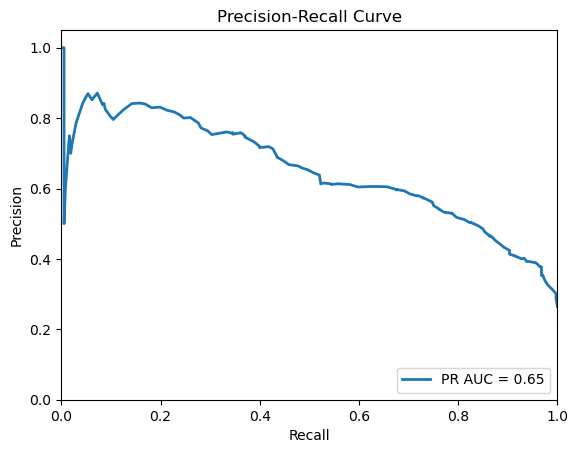

In [23]:
from sklearn.metrics import precision_recall_curve, auc

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds using the predicted probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the PR AUC using the precision and recall arrays
pr_auc = auc(recall, precision)

# Print the PR AUC
print("PR AUC:", pr_auc)

# Plot the precision-recall curve
plt.plot(recall, precision, lw=2, label='PR AUC = %0.2f' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# 1.8 Log-Loss (Cross-Entropy Loss)
Log-loss is a metric that measures the uncertainty of a model’s probability estimates. It penalises incorrect classifications and rewards correct classifications. Lower log-loss values indicate better performance, with a value of 0 representing a perfect classifier. The equation for log-loss is:

![Alt text](Images/log%20loss.png)

- **N** is the number of observations.
- **y_test** is the true label (0 or 1) for a binary classification problem.
- **y_prob** is the predicted probability that the label is 1.

Log-loss is helpful when you need to evaluate probabilistic predictions (such as when using logistic regression or neural networks). It should be used alongside other metrics for a more comprehensive understanding of class-specific performance.

**Summary:**

- Probabilistic predictions: Measures the performance of models that output probability estimates, encouraging well-calibrated predictions.
- Log loss can be used to compare the performance of different models or to optimise the performance of a single model.
- Suitable for imbalanced data.
- Highly sensitive to extreme probability predictions, which can result in large penalty values for misclassified instances.
- Can be difficult to interpret and communicate to non-technical stakeholders.


In [24]:
from sklearn.metrics import log_loss

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate the log loss using the predicted probabilities
logloss = log_loss(y_test, y_pred_proba)

# Print the log loss
print("Log Loss:", logloss)

Log Loss: 0.4415590224976346


# 1.9 Cohen's kappa

Cohen's Kappa is a statistic that measures the agreement between predicted and actual class labels, taking into account the possibility of chance agreement. Here are some pros and cons of using Cohen's Kappa:

Cohen's Kappa is a useful metric for evaluating the agreement between predicted and actual class labels, especially when the classes are imbalanced or the data has a high level of agreement by chance. However, it may not be appropriate for all contexts, and its interpretation depends on the prevalence of each class and the level of agreement by chance.

**Summary:**

- Useful metric when the classes are imbalanced or the data has a high level of agreement by chance.
- Can help to evaluate inter-rater agreement in tasks such as medical diagnosis, where multiple raters may assign class labels to the same instances.
- Provides a single metric for evaluating model performance, which can be useful for comparing different models or tuning hyperparameters.
- Relative measure of agreement, which means that the level of agreement depends on the prevalence of each class and the level of agreement by chance.
- Can be difficult to interpret when the sample size is small or the prevalence of one or both classes is extremely low or high.
- CMay not be appropriate for evaluating model performance in some contexts, such as when the goal is to minimize false positives or false negatives.


In [25]:
from sklearn.metrics import cohen_kappa_score

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Print the kappa value
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.41688508759828935


# 1.10 Matthews Correlation Coefficient (MCC)

The Matthews Correlation Coefficient (MCC) is a metric that takes into account true and false positives and negatives, and is a useful metric when the classes are imbalanced. Here are some pros and cons of using MCC:

the Matthews Correlation Coefficient (MCC) is a useful metric for evaluating binary classification models, especially when the classes are imbalanced or the data has a high level of agreement by chance. However, it may not be as widely recognized or easy to interpret as other metrics, and its interpretation depends on the prevalence of each class.

**Summary**:

- Useful metric when the classes are imbalanced or the data has a high level of agreement by chance.
- Symmetric metric that takes into account both positive and negative class performance.
- MCC is a useful metric when the goal is to maximize both sensitivity and specificity.
- May be difficult to interpret when the prevalence of one or both classes is extremely low or high.
- May not be as intuitive or easy to explain as other metrics.
- May not be as widely used or recognized as other metrics such as AUC or F1-score.

In [26]:
from sklearn.metrics import matthews_corrcoef

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Print the MCC value
print("Matthews Correlation Coefficient (MCC):", mcc)

Matthews Correlation Coefficient (MCC): 0.4317142311546307


# 1.11 The geometric mean (G-mean)
The geometric mean (G-mean) is a metric that combines sensitivity and specificity, and is a useful metric when the classes are imbalanced. 

The geometric mean (G-mean) is a useful metric for evaluating binary classification models, especially when the classes are imbalanced or the data has a high level of agreement by chance. However, it may not be as widely recognized or easy to interpret as other metrics, and its interpretation depends on the prevalence of each class.

**Summary**:

- Useful metric when the classes are imbalanced or the data has a high level of agreement by chance.
- Symmetric metric that takes into account both positive and negative class performance.
- Useful metric when the goal is to maximize both sensitivity and specificity.
- May be difficult to interpret when the prevalence of one or both classes is extremely low or high.
- May not be as intuitive or easy to explain as other metrics.
- May not be as widely used or recognized as other metrics such as AUC or F1-score.

In [27]:
from sklearn.metrics import confusion_matrix

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the G-mean
g_mean = np.sqrt(tp / (tp + fn) * tn / (tn + fp))

# Print the G-mean
print("G-mean:", g_mean)

G-mean: 0.6431020749941492


# 1.12 Balanced accuracy

Balanced Accuracy is a metric that calculates the average of sensitivity and specificity, and is useful when the classes are imbalanced. Here are some pros and cons of using Balanced Accuracy:

Balanced Accuracy is a useful metric for evaluating binary classification models, especially when the classes are imbalanced or the data has a high level of agreement by chance. However, it may not be as widely recognized or easy to interpret as other metrics, and its interpretation depends on the prevalence of each class.

**Summary**:

- Useful metric when the classes are imbalanced or the data has a high level of agreement by chance.
- Symmetric metric that takes into account both positive and negative class performance.
- Useful metric when the goal is to maximize both sensitivity and specificity.
- May be difficult to interpret when the prevalence of one or both classes is extremely low or high.
- May not be as intuitive or easy to explain as other metrics.
- May not be appropriate for evaluating model performance in some contexts, such as when the goal is to minimize false positives or false negatives.

In [28]:
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)

# Calculate the Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print the Balanced Accuracy
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.6857331766849193


# 1.13 Informedness

Informedness is a metric that measures the extent to which a test can discriminate between positive and negative instances, taking into account both true positive rate (TPR) and true negative rate (TNR).

Informedness is a useful metric for evaluating binary classification models, especially when the classes are imbalanced. However, it may not be as widely recognized or easy to interpret as other metrics, and its interpretation depends on the prevalence of each class.

**Summary**:

- Useful metric for evaluating binary classification models when the classes are imbalanced.
- Takes into account both true positive rate (TPR) and true negative rate (TNR), which are important measures of classification performance.
- Provides a single metric for evaluating model performance, which can be useful for comparing different models or tuning hyperparameters.
- May be difficult to interpret when the prevalence of one or both classes is extremely low or high.
- May not be as widely recognized or easy to interpret as other metrics such as AUC or F1-score.
- May not be appropriate for evaluating model performance in some contexts, such as when the goal is to minimize false positives or false negatives.

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the testing set (including probabilities)
y_pred = model.predict(X_test)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# Calculate the Informedness
informedness = tp / (tp + fn) + tn / (tn + fp) - 1

# Print the Informedness
print("Informedness:", informedness)

Informedness: 0.3714663533698386


# 1.14 Markedness

Markedness is a metric that measures the extent to which positive predictions are correct, taking into account both positive predictive value (PPV) and negative predictive value (NPV).

Markedness is a useful metric for evaluating binary classification models, especially when the classes are imbalanced. However, it may not be as widely recognized or easy to interpret as other metrics, and its interpretation depends on the prevalence of each class.

**Summary**:

- Useful metric for evaluating binary classification models when the classes are imbalanced.
- Takes into account both positive predictive value (PPV) and negative predictive value (NPV), which are important measures of classification performance.
- Provides a single metric for evaluating model performance, which can be useful for comparing different models or tuning hyperparameters.
- May be difficult to interpret when the prevalence of one or both classes is extremely low or high.
- May not be as widely recognized or easy to interpret as other metrics such as AUC or F1-score.
- May not be appropriate for evaluating model performance in some contexts, such as when the goal is to minimize false positives or false negatives.

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# True binary labels
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

# Predicted binary labels
y_pred = np.array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate the Markedness
markedness = tp / (tp + fp) + tn / (tn + fn) - 1

# Print the Markedness
print("Markedness:", markedness)

Markedness: 0.19999999999999996
